# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:34:54.379773: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:34:57.696041
2025-04-14 19:34:57.696041


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 259
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:34:51"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

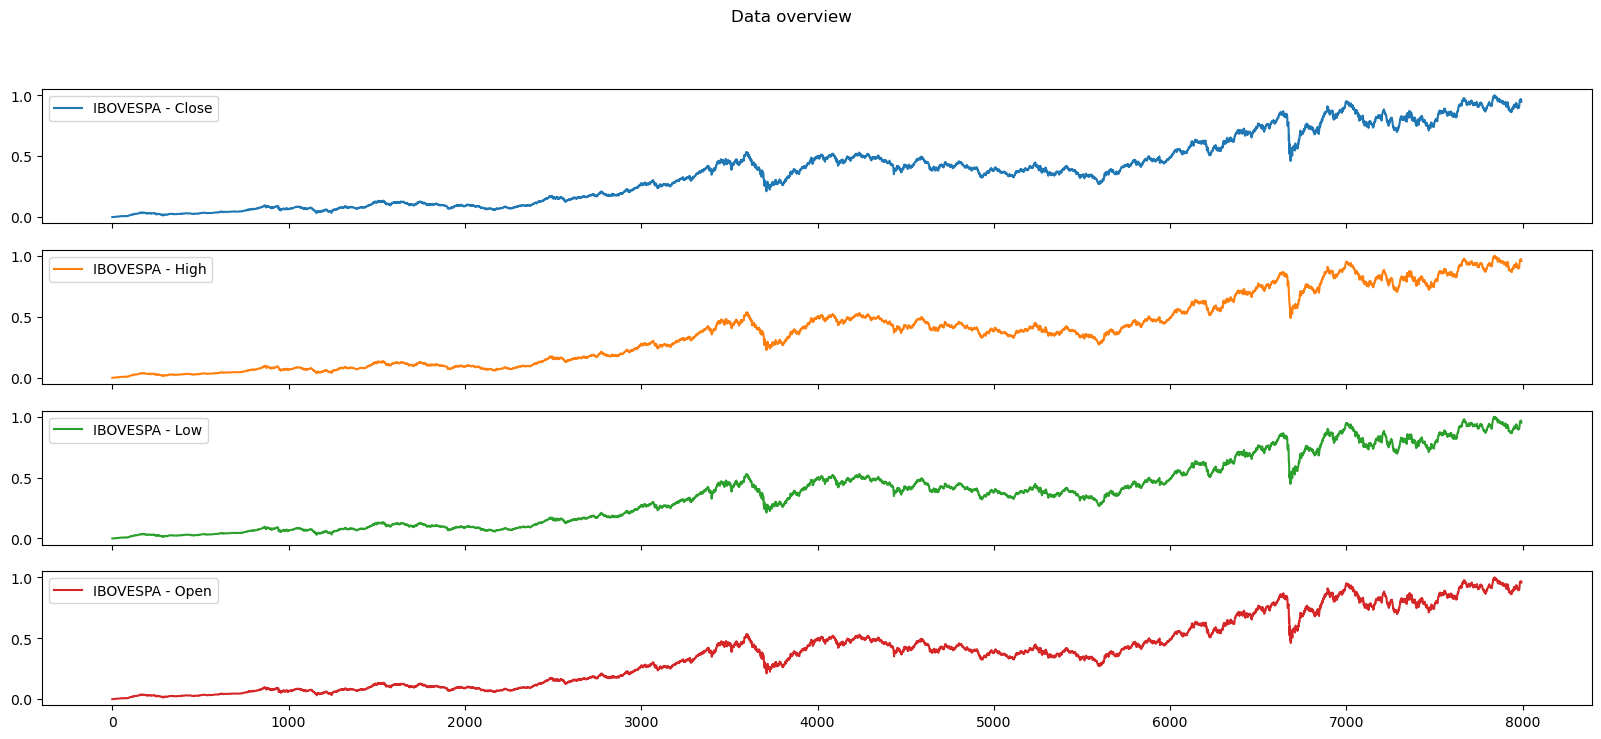

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

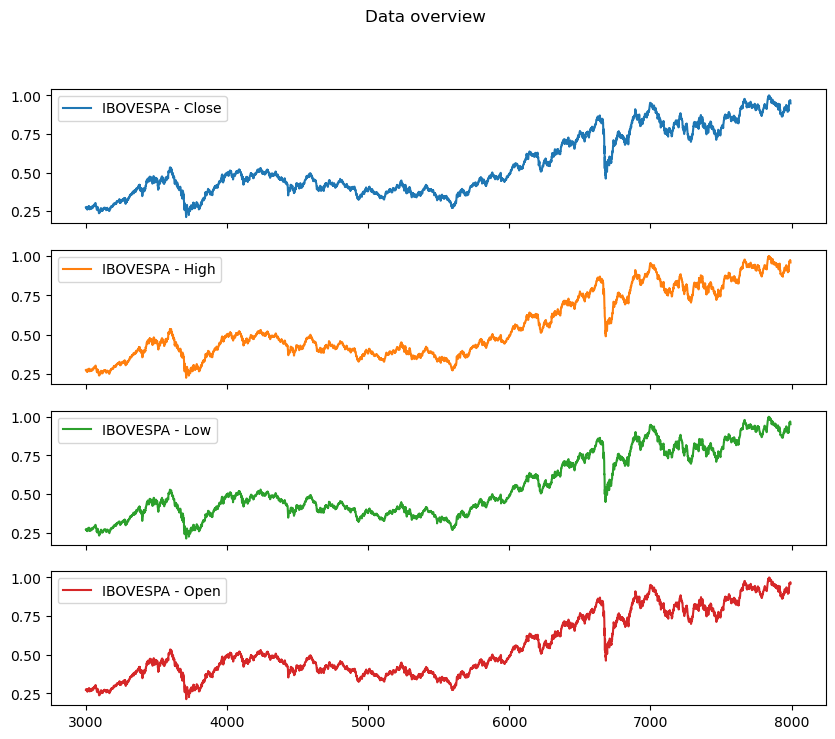

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

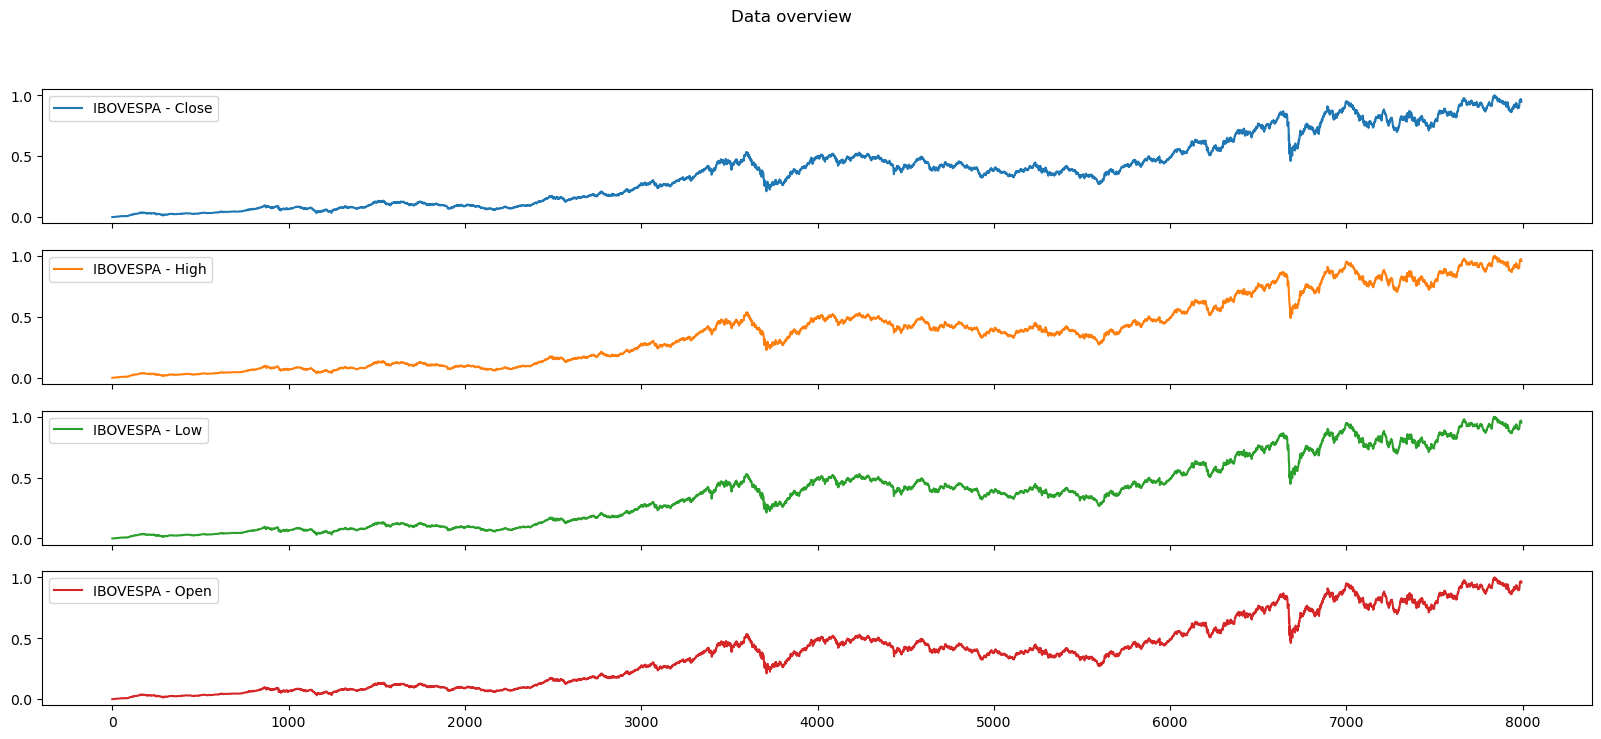

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

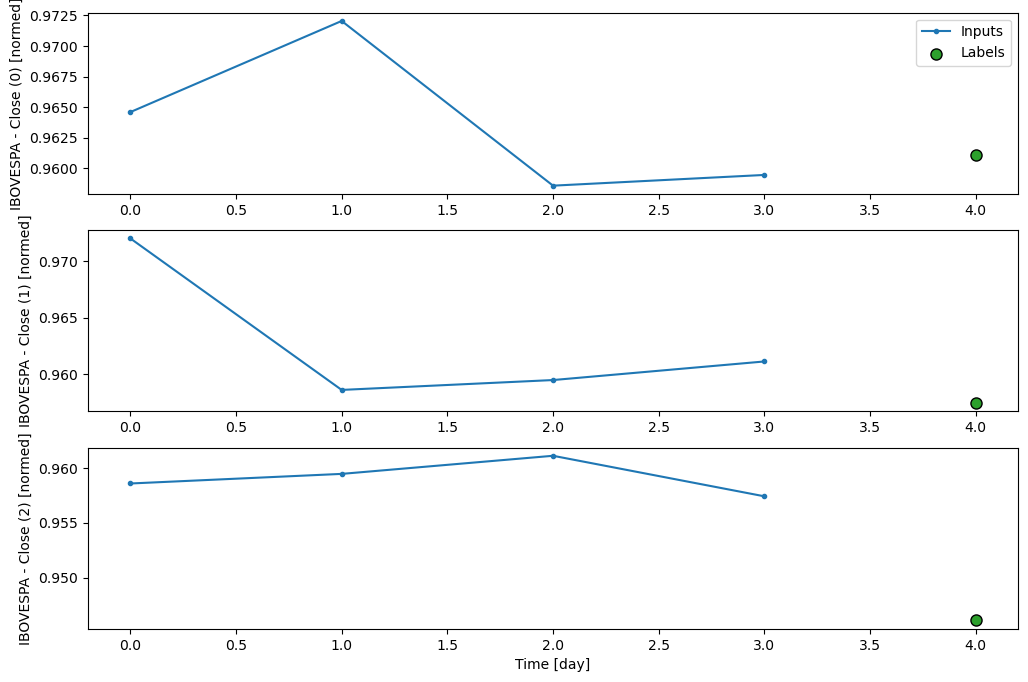

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

4

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 17:03 4s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 61.2956 - mean_squared_error: 2.5768e-05 - root_mean_squared_error: 0.0048  

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 50.0883 - mean_squared_error: 4.6828e-05 - root_mean_squared_error: 0.0065

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 42.5546 - mean_squared_error: 5.1786e-05 - root_mean_squared_error: 0.0070 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 36.6473 - mean_squared_error: 5.1073e-05 - root_mean_squared_error: 0.0070

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 33.1493 - mean_squared_error: 6.1452e-05 - root_mean_squared_error: 0.0076

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 31.6577 - mean_squared_error: 7.0400e-05 - root_mean_squared_error: 0.0081

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 30.7809 - mean_squared_error: 8.5874e-05 - root_mean_squared_error: 0.0088

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 30.0419 - mean_squared_error: 1.0409e-04 - root_mean_squared_error: 0.0096

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 28.8333 - mean_squared_error: 1.2917e-04 - root_mean_squared_error: 0.0106

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.8505 - mean_squared_error: 1.4743e-04 - root_mean_squared_error: 0.0113

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 27.1875 - mean_squared_error: 1.7747e-04 - root_mean_squared_error: 0.0123

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 26.8048 - mean_squared_error: 2.0999e-04 - root_mean_squared_error: 0.0133

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 26.4765 - mean_squared_error: 2.3429e-04 - root_mean_squared_error: 0.0140

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 26.2027 - mean_squared_error: 2.5369e-04 - root_mean_squared_error: 0.0145

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 25.8956 - mean_squared_error: 2.8310e-04 - root_mean_squared_error: 0.0153

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 25.4844 - mean_squared_error: 3.5329e-04 - root_mean_squared_error: 0.0168

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 25.1648 - mean_squared_error: 4.3164e-04 - root_mean_squared_error: 0.0182

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 24.9759 - mean_squared_error: 5.2830e-04 - root_mean_squared_error: 0.0197

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 24.8449 - mean_squared_error: 6.3362e-04 - root_mean_squared_error: 0.0211

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 24.7162 - mean_squared_error: 7.3712e-04 - root_mean_squared_error: 0.0225

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 24.5055 - mean_squared_error: 9.2512e-04 - root_mean_squared_error: 0.0249

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 24.3018 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0268    

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 24.0773 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0286

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 23.8978 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0299

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 23.7439 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0309

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 23.6169 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 23.4485 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 23.2210 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 23.0071 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0354

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 22.8283 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 22.7212 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0373

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 22.5926 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0382

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 22.4843 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0389


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 22.3310 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398 - val_loss: 0.1330 - val_mean_absolute_error: 0.1330 - val_mean_absolute_percentage_error: 14.2356 - val_mean_squared_error: 0.0192 - val_root_mean_squared_error: 0.1386


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.7754 - mean_absolute_error: 0.7754 - mean_absolute_percentage_error: 36383.9258 - mean_squared_error: 0.6012 - root_mean_squared_error: 0.7754

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7606 - mean_absolute_error: 0.7606 - mean_absolute_percentage_error: 18000.0859 - mean_squared_error: 0.5793 - root_mean_squared_error: 0.7610 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7033 - mean_absolute_error: 0.7033 - mean_absolute_percentage_error: 11996.1338 - mean_squared_error: 0.5095 - root_mean_squared_error: 0.7117 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6336 - mean_absolute_error: 0.6336 - mean_absolute_percentage_error: 9321.9072 - mean_squared_error: 0.4400 - root_mean_squared_error: 0.6575 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5624 - mean_absolute_error: 0.5624 - mean_absolute_percentage_error: 7559.2573 - mean_squared_error: 0.3781 - root_mean_squared_error: 0.6044

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5217 - mean_absolute_error: 0.5217 - mean_absolute_percentage_error: 6745.0898 - mean_squared_error: 0.3457 - root_mean_squared_error: 0.5746

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4866 - mean_absolute_error: 0.4866 - mean_absolute_percentage_error: 6106.3408 - mean_squared_error: 0.3187 - root_mean_squared_error: 0.5486

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4660 - mean_absolute_error: 0.4660 - mean_absolute_percentage_error: 5750.9497 - mean_squared_error: 0.3032 - root_mean_squared_error: 0.5332

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4301 - mean_absolute_error: 0.4301 - mean_absolute_percentage_error: 5163.0410 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.5059

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 4643.3828 - mean_squared_error: 0.2523 - root_mean_squared_error: 0.4798

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3685 - mean_absolute_error: 0.3685 - mean_absolute_percentage_error: 4228.4751 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4575

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 3994.8989 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4443

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 3821.1565 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4342

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 3633.6426 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4230

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 3413.2585 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4093

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 3198.2500 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3955

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 3011.3035 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3831

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 2864.4553 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3733

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 2732.6626 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3642

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 2656.8958 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3589

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 2599.5610 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3548

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 2518.5215 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3490

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 2418.7676 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3417

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 2316.4722 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3340

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 2223.2861 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3268

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 2138.0181 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3201

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 2059.6792 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3139

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 1987.4276 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3080

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 1920.5432 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3025

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1958 - mean_absolute_error: 0.1958 - mean_absolute_percentage_error: 1865.1285 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.2980

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 1806.8506 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.2931

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 1752.4403 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2885


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 1735.1085 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2871 - val_loss: 0.1368 - val_mean_absolute_error: 0.1368 - val_mean_absolute_percentage_error: 14.6433 - val_mean_squared_error: 0.0202 - val_root_mean_squared_error: 0.1420


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.4879 - mean_absolute_error: 0.4879 - mean_absolute_percentage_error: 22905.3242 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4879

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4787 - mean_absolute_error: 0.4787 - mean_absolute_percentage_error: 11319.9307 - mean_squared_error: 0.2294 - root_mean_squared_error: 0.4789 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4666 - mean_absolute_error: 0.4666 - mean_absolute_percentage_error: 8225.8096 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4670 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4506 - mean_absolute_error: 0.4506 - mean_absolute_percentage_error: 6693.7607 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4522

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - mean_absolute_percentage_error: 5450.7266 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4270

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3815 - mean_absolute_error: 0.3815 - mean_absolute_percentage_error: 4552.5171 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3996

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 3991.3167 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3782

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 3712.7341 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3663

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 3474.5874 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3554

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 3230.3674 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3435

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 2958.7002 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3294

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 2708.0920 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.3154

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 2500.6230 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.3032

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 2419.3611 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2982

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 2325.7178 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2923

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 2239.8257 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2867

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 2101.8047 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2775

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 1981.4415 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2692

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 1886.6058 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2624

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 1832.2847 - mean_squared_error: 0.0764 - root_mean_squared_error: 0.2585

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 1771.5077 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2540

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 1715.0375 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2497

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 1653.9957 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2450

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 1582.2346 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2393

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 1538.0966 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2358

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 1503.3419 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2329

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 1457.5028 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2291

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 1408.7524 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2250

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1515 - mean_absolute_error: 0.1515 - mean_absolute_percentage_error: 1363.4719 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2211

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 1326.4109 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2179

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 1296.3701 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2153

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 1272.4636 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2132

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 1249.5205 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2112

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 1231.8153 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2097

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 1202.1300 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2071

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 1166.2039 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2039


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 1154.7576 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2029 - val_loss: 0.0779 - val_mean_absolute_error: 0.0779 - val_mean_absolute_percentage_error: 8.2882 - val_mean_squared_error: 0.0072 - val_root_mean_squared_error: 0.0846


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 11915.5166 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2534

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 4755.7690 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2181  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 3230.9958 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1867

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 2506.7036 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1659

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 2111.2056 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1524

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 1864.0897 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1431

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1650.4375 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1344

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 1466.8790 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1263

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1338.0442 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1203

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 1208.6761 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1140

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 1113.9332 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1091

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 1050.9125 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1058

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 1018.3348 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1040

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 987.9441 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1024 

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 932.8478 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0994

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 878.4852 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0965

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 840.8276 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0945

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 801.9569 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0924

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 758.6293 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0900

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 727.5241 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0883

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 709.4730 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0873

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 692.3840 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0863

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 676.1797 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0853

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 651.9213 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0839

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 626.8216 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0823

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 603.7583 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0809

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 584.7695 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0796

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 573.5552 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0789

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 558.6309 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0780

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 546.5074 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0772

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 534.9551 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0766

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 522.1405 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0759


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 509.9878 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0753 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334 - val_mean_absolute_percentage_error: 3.5684 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0386


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 11107.7246 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2363

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 4448.8364 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.2057  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1635 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 3017.2998 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1753

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 2339.6267 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1554

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1932.0642 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1412

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1656.9587 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1306

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 1476.8279 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1230

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 1320.1564 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1161

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 1196.6504 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1102

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 1138.6466 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1074

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 1076.8915 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1044

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 1022.1887 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1016

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 958.1788 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0982 

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 896.0207 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0948

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 842.1936 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0919

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 795.0933 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0893

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 753.5024 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0870

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 716.4705 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0850

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 683.2521 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0831

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 653.2707 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0814

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 626.0620 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0797

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 598.6219 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0781

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 578.5114 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0768

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 564.3788 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0760

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 544.5494 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0747

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 526.1945 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0735

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 509.1554 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0724

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 491.6000 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0713


Epoch: 5 - LR: 0.008821624331176281


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 476.9074 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0704 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251 - val_mean_absolute_percentage_error: 2.6897 - val_mean_squared_error: 9.0558e-04 - val_root_mean_squared_error: 0.0301


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 12300.1348 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2617

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 4965.0684 - mean_squared_error: 0.0554 - root_mean_squared_error: 0.2345  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 3295.6643 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.2021

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 2593.0925 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1818

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 2201.1533 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1684

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 1924.0540 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1579

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 1693.4635 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1485

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 1517.6906 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1408

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 1378.5347 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1343

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1265.1367 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1287

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1190.3724 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1248

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 1107.5631 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1203

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 1044.0094 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1167

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 994.6899 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1138 

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 950.2867 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1112

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 910.0904 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1088

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 868.5474 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1063

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 831.0015 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1039

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 796.8822 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1018

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 762.0195 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0995

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 730.3770 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0974

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 698.4688 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0953

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 672.2861 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0935

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 648.1860 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0919

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 625.9208 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0903

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 605.2869 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0889

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 586.1088 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0877

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 568.2276 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0865


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 555.1340 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0856 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315 - val_mean_absolute_percentage_error: 3.3621 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0365


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 14878.6172 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.3167

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 6069.1289 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2951  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 4223.5791 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2671

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 3474.6436 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2472

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 2862.0381 - mean_squared_error: 0.0542 - root_mean_squared_error: 0.2273

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 2452.5334 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2116

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_absolute_percentage_error: 2156.4290 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.1990

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 1953.2153 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1896

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 1788.7429 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1815

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 1684.3649 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1761

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 1592.7915 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1711

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 1499.0973 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1659

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - mean_absolute_percentage_error: 1428.0387 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1618

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 1364.1014 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1580

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 1306.2296 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1545

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 1245.2449 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1506

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 1197.7893 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1476

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1154.1841 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1448

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 1113.9656 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1421

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 1076.7411 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1396

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 1036.6505 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1368

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 999.7318 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1342 

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 956.3258 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1311

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 912.7249 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1279

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 873.2950 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1250

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 840.8843 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1225

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 811.0182 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1201

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 783.3995 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1179

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 757.7783 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1159

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 736.5078 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1142

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 714.0975 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1123


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 699.9778 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1112 - val_loss: 0.0410 - val_mean_absolute_error: 0.0410 - val_mean_absolute_percentage_error: 4.3711 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0443


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 11600.2852 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2467

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 4689.5747 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2225  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 3229.4861 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1964

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 2524.4736 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1772

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 2097.7581 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1633

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 1807.7606 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1525

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 1595.4988 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1436

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 1432.6429 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1363

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 1303.1313 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1300

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1186.7974 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1241

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 1109.1799 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1199

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 1042.0923 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1161

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 976.6451 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1123 

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 919.7245 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1089

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 869.7532 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1059

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 825.4753 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1032

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 785.9256 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1007

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 750.3606 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0985

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 718.1937 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0964

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 688.9429 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0944

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 662.2150 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0926

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 637.6892 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0909

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 615.0868 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0893

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 594.1819 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0878

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 576.8739 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0865

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 558.6878 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0852

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 541.7260 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0840


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 531.0388 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0832 - val_loss: 0.0406 - val_mean_absolute_error: 0.0406 - val_mean_absolute_percentage_error: 4.3276 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0439


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 12639.0215 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2689

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 5119.1738 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2445  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 3540.6909 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2181

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 2769.9883 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1968

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 2302.2036 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1812

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 1984.6908 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1692

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 1822.6870 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1625

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 1687.9850 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1566

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 1556.8287 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1506

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 1418.5363 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1439

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 1305.6207 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1382

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1211.1804 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1333

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 1130.8260 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1289

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1061.5011 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1249

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 1001.0202 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1213

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 953.3682 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1184 

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 910.5045 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1158

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 876.3635 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1136

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 844.9522 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1116

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 808.0526 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1092

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 774.5521 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1069

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 743.9847 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1048

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 718.9676 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1030

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 695.7416 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1013

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 671.5142 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0996

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 649.0782 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0979

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 628.2397 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0963

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 608.8303 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0948

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 588.7611 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0933


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 586.8373 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0932 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_absolute_percentage_error: 1.7462 - val_mean_squared_error: 4.4777e-04 - val_root_mean_squared_error: 0.0212


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 11471.5508 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2440

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 4917.5322 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2246  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 3439.0774 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.2030

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 2638.5105 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1823

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 2170.9250 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1676

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 1859.5029 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1562

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 1613.5024 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1462

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1447.2463 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1388

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 1315.5786 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1325

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 1208.5881 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1272

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 1119.5149 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1226

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 1043.9736 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1185

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 978.9664 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1148 

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 922.3588 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1115

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 867.4376 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1082

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 823.8600 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1054

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 780.7968 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1026

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 746.0856 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1003

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 714.6248 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0981

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 685.9631 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0961

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 656.9532 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0940

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 633.0635 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0923

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 611.0155 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0906

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 588.4218 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0889

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 569.6101 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0874

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 550.2072 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0859


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 533.9533 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0846 - val_loss: 0.0380 - val_mean_absolute_error: 0.0380 - val_mean_absolute_percentage_error: 4.0509 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0411


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 10035.9414 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2133

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 4048.1331 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1909  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 2784.4880 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1680

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 2282.8062 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1546

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 1841.5363 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1409

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 1582.5161 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1317

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 1394.4777 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1243

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 1250.8629 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1183

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 1137.1930 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1131

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1044.9384 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1088

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 968.2004 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1052 

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 903.1006 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1019

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 847.0563 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0989

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 798.2427 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0962

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 755.3347 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0938

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 717.2696 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0916

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 679.6745 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0893

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 649.3902 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0874

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 621.9570 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0857

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 596.9760 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0840

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 574.1202 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0825

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 553.1207 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0810

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 533.7512 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0796

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 515.8230 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0783

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 499.1787 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0771

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 483.6825 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0760

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 469.2164 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0749


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 463.0928 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0745 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313 - val_mean_absolute_percentage_error: 3.3197 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0351


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 10730.0176 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2282

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 4330.0059 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.2047  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 2984.1877 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1811

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 2331.0576 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1630

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 1935.5192 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1499

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 1719.0403 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1417

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1509.3806 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1330

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 1350.1202 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1259

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1263.3436 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1218

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1154.2987 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1163

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 1064.4495 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1116

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 988.9139 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1075 

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 924.4011 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1038

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 868.5786 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1005

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 819.7718 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0975

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 781.2261 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0951

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 746.4906 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0929

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 711.2803 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0906

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 679.5546 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0885

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 650.8055 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0865

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 624.6190 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0847

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 600.6584 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0830

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 578.6423 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0814

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 558.3351 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0799

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 539.5389 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0784

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 520.2283 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0770

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 504.1082 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0758


Epoch: 12 - LR: 0.007401445880532265


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 487.4434 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0746 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248 - val_mean_absolute_percentage_error: 2.6332 - val_mean_squared_error: 8.3941e-04 - val_root_mean_squared_error: 0.0290


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 10990.7832 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2337

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 4443.5762 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.2111  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 3070.6143 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1879

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1569 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 2347.3582 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1679

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 1960.6672 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1550

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 1671.0101 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1439

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 1481.7906 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1360

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 1321.1100 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1287

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 1206.7740 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1231

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 1112.9794 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1185

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1034.1929 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1145

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 966.9041 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1108 

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 920.9289 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1082

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 873.9953 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1055

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 832.0911 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1030

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 798.9199 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1009

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 776.9670 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0995

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 752.3300 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0979

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 733.0851 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0967

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 704.4636 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0948

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 678.2111 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0930

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 651.1473 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0911

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 626.3696 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0893

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 603.5891 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0876

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 582.5656 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0861

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 563.0969 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0846

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 546.9590 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0834

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 531.8130 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0822

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 515.8455 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0810


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 509.0874 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0805 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 1.6063 - val_mean_squared_error: 3.6957e-04 - val_root_mean_squared_error: 0.0192


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 10194.8789 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2167

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 4127.6709 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1966  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 2853.9160 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1752

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 2233.3171 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1583

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 1857.1896 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1461

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1601.6422 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1365

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1414.6102 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1289

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1271.0436 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1225

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 1156.9443 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1171

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1064.0231 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1125

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 986.4747 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1085 

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 920.5783 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1050

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 863.7806 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1018

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 819.4485 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0992

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 794.2318 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0977

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 766.1663 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0960

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 740.2197 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0943

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 712.3099 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0926

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 679.6795 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0904

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 653.3315 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0887

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 629.1489 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0870

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 606.8668 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0855

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 586.2629 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0840

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 571.7957 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0829

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 555.8826 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0817

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 545.1021 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0809

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 532.7595 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0800

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 515.3612 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0787

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 499.1746 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0774

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 484.0735 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0762


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 474.5571 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0755 - val_loss: 0.0366 - val_mean_absolute_error: 0.0366 - val_mean_absolute_percentage_error: 3.9029 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0395


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 9313.9297 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1979

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 3747.8843 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1757 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 2575.0823 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1542

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 1965.3059 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1376

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1670.5002 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1282

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 1440.2321 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1200

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 1271.9192 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1134

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1130.2506 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1074

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 1030.1281 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1028

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 948.4984 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0991 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 880.2552 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0959

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 822.1620 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0930

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 772.0103 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0903

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 728.2425 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0879

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 685.7011 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0856

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 651.8792 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0837

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 621.5762 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0819

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 594.2427 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0803

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 569.4467 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0788

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 546.8395 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0773

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 523.9406 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0758

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 505.0703 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0745

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 485.7885 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0732

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 469.7734 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0720

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 454.8845 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0709

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 441.0062 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 428.0372 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0690 - val_loss: 0.0143 - val_mean_absolute_error: 0.0143 - val_mean_absolute_percentage_error: 1.5542 - val_mean_squared_error: 3.5067e-04 - val_root_mean_squared_error: 0.0187


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 9768.7246 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2076

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1863 - mean_absolute_error: 0.1863 - mean_absolute_percentage_error: 3948.6924 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1873 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1612 - mean_absolute_error: 0.1612 - mean_absolute_percentage_error: 2727.4004 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1665

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 2133.6274 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1504

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 1774.2672 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1389

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1530.1477 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1299

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1351.4825 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1226

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 1214.3293 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1166

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 1105.3557 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1114

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 1007.8178 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1068

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 935.2338 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1032 

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 873.4387 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0999

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 820.0917 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0969

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 773.5206 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0943

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 732.4839 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0918

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 696.0019 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0896

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 663.3334 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0875

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 640.1812 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0859

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 612.9176 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0841

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 588.1049 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0824

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 565.4165 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0808

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 544.5817 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0793

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 525.3738 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0779

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 509.5122 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0767

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 500.1245 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0759

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 491.1122 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0752

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 480.7607 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0744

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 469.2783 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0736

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 455.3765 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0725


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 453.8902 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0724 - val_loss: 0.0303 - val_mean_absolute_error: 0.0303 - val_mean_absolute_percentage_error: 3.2228 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0337


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 8112.9590 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1723

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 3673.3660 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1562  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 2805.6184 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1443

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 2092.6980 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1282

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1699.9186 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1175

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 1444.5139 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1095

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 1244.6177 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1024

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 1098.5002 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0967

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 997.6974 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0924 

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 925.1426 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0891

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 847.6877 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0855

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 783.5521 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0823

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 734.9788 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0798

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 687.7632 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0772

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 646.8253 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0749

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 610.9883 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0729

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 579.3203 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0710

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 551.0989 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 525.7740 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0679

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 502.9012 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0665

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 482.1293 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0651

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 463.1703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0639

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 445.7899 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0627

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 431.5060 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 418.1974 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0608

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 404.2673 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0598

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 391.3255 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 381.8771 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 370.4459 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 366.8042 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0572 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247 - val_mean_absolute_percentage_error: 2.6155 - val_mean_squared_error: 8.1700e-04 - val_root_mean_squared_error: 0.0286


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 9104.3086 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1935

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 3665.1509 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1721 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 2521.8577 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1515

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 1969.4685 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1364

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1635.7611 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1257

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 1410.0443 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1175

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 1245.0865 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1110

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1118.5288 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1056

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1018.0223 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1009

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 936.2791 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0971 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 868.1332 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0939

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 810.2391 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0910

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 760.3334 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0884

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 716.8207 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0859

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 678.5158 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0838

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 640.9486 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0815

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 610.8690 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0797

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 583.7602 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0779

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 559.1890 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0763

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 536.8029 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0748

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 516.3157 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0734

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 497.4865 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0721

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 480.1147 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0708

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 464.0319 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0696

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 449.0975 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0685

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 436.6887 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0676

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 429.3109 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0671

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 422.2035 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0666


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 418.0655 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663 - val_loss: 0.0252 - val_mean_absolute_error: 0.0252 - val_mean_absolute_percentage_error: 2.6769 - val_mean_squared_error: 8.5732e-04 - val_root_mean_squared_error: 0.0293


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 8349.5195 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1774

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 3555.1594 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1593 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 2384.8044 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1396

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 1889.7126 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1266

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1684.4718 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1207

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 1524.1576 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1155

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 1351.4180 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1096

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 1201.4231 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1040

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 1072.0608 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0988

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 970.7669 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0944 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 889.1438 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0907

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 821.8525 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0876

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 759.3200 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0846

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 711.4506 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0822

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 669.8489 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0800

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 633.3309 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0779

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 611.3492 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0767

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 590.9994 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0755

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 572.1011 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0743

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 551.6811 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0731

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 527.6854 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0715

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 505.8940 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0701

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 486.0077 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0688

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 467.7793 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0675

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 451.0009 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 435.5005 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0652

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 421.1331 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 407.7767 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 395.3272 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622


Epoch: 19 - LR: 0.0062098996713757515


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 383.6931 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614 - val_loss: 0.0207 - val_mean_absolute_error: 0.0207 - val_mean_absolute_percentage_error: 2.1962 - val_mean_squared_error: 6.1270e-04 - val_root_mean_squared_error: 0.0248


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1665 - mean_absolute_error: 0.1665 - mean_absolute_percentage_error: 7840.0522 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1665

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 3146.2173 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1463 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 2156.2761 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1276

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1682.2664 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1148

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 1371.3010 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1048

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 1184.8076 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0980

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 1047.6328 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0924

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 942.0869 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0878 

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 857.9296 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0839

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 789.1338 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0805

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 731.6557 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0775

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 682.7940 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0749

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 636.3411 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0723

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 600.1415 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0702

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 564.9220 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 536.9151 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 511.8190 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0647

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 494.0230 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 473.0571 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0622

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 453.9668 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 436.5042 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 420.4625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0585

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 405.6690 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0574

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 396.4277 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 387.6395 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 375.2348 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0552

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 366.1777 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 354.0460 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0537


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 352.8833 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536 - val_loss: 0.0207 - val_mean_absolute_error: 0.0207 - val_mean_absolute_percentage_error: 2.1979 - val_mean_squared_error: 6.1055e-04 - val_root_mean_squared_error: 0.0247


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 8855.2129 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1882

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1667 - mean_absolute_error: 0.1667 - mean_absolute_percentage_error: 3567.6719 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1678 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 2458.0327 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1483

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 1920.5667 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1337

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 1595.8529 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1233

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1375.7153 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1153

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 1214.7985 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1088

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 1091.3488 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1035

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 993.3196 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0990 

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 921.7028 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0956

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 853.9319 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0924

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 790.5968 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0892

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 741.8989 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0866

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 699.4362 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0842

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 662.0491 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0820

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 628.8438 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0800

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 599.1312 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0782

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 569.5606 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0763

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 545.5762 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0747

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 523.7244 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0732

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 503.7250 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0718

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 485.3437 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0705

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 466.5813 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0691

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 451.0120 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 436.5496 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0668

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 423.0780 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0658

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 409.1475 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0648


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 407.8121 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0647 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236 - val_mean_absolute_percentage_error: 2.4981 - val_mean_squared_error: 7.5782e-04 - val_root_mean_squared_error: 0.0275


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1662 - mean_absolute_error: 0.1662 - mean_absolute_percentage_error: 7824.8076 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1662

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1451 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 3141.6770 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1463 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 2155.0913 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1279

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 1681.5251 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1151

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1395.8369 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1059

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 1184.4402 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0982

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 1047.4037 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0927

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 952.5117 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0886 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 875.1296 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0850

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 803.4925 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0816

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 743.8802 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0786

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 693.3428 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0759

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 649.8878 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0735

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 612.0807 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0714

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 578.8609 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 546.3373 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0674

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 520.3359 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0658

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 496.9326 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 475.7441 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 456.4604 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 440.7132 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 424.3716 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0593

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 409.3130 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0582

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 395.3874 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0572

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 382.4683 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 370.4487 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 359.2364 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 353.3275 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541 - val_loss: 0.0154 - val_mean_absolute_error: 0.0154 - val_mean_absolute_percentage_error: 1.6499 - val_mean_squared_error: 3.7832e-04 - val_root_mean_squared_error: 0.0195


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 8278.8691 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1759

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 3335.3416 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1568 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 2297.0491 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1384

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 1794.1689 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1246

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1490.1086 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1147

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 1265.3092 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1065

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 1119.6101 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1006

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 1007.4230 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0958

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 918.0865 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0916 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 845.2546 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0883

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 784.3824 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0854

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 743.4153 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0834

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 706.9526 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0815

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 665.5327 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0792

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 629.1790 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0771

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 596.9793 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0753

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 568.2339 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0735

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 542.3992 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0719

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 516.5800 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0702

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 495.5600 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 474.3162 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0673

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 456.8457 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0661

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 439.0269 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 424.2512 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0637

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 410.5343 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0627

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 397.7643 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0617

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 384.5673 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0607


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 380.7973 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604 - val_loss: 0.0226 - val_mean_absolute_error: 0.0226 - val_mean_absolute_percentage_error: 2.3970 - val_mean_squared_error: 7.0131e-04 - val_root_mean_squared_error: 0.0265


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 - mean_absolute_percentage_error: 7194.6523 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1528

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 2882.3518 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1334 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1972.7628 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1160

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 1539.3320 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1045

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 1278.3312 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0965

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 1101.9261 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0904

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 973.1337 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0857 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 874.4172 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0817

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 796.0985 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0783

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 732.4255 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0756

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 696.0370 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0740

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 663.5115 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0726

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 620.6249 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0705

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 583.4874 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0686

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 550.9885 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0669

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 525.3048 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0655

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 499.4133 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0640

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 476.2040 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 455.2673 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0614

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 436.2731 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0602

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 418.9549 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0590

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 403.0937 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0580

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 388.5062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 375.0402 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0560

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 363.9071 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 350.9782 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 340.1822 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 329.0175 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 327.9472 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526 - val_loss: 0.0229 - val_mean_absolute_error: 0.0229 - val_mean_absolute_percentage_error: 2.4252 - val_mean_squared_error: 7.1518e-04 - val_root_mean_squared_error: 0.0267


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 7251.9521 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1540

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 2906.2605 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1347 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 1990.4144 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1173

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 1552.6615 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1055

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 1288.8497 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0972

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 1110.1895 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0908

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 979.6526 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0857 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 879.6780 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0815

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 800.2437 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0778

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 729.0560 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0744

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 681.5451 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0721

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 635.7046 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0696

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 596.2307 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0675

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 558.2949 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0653

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 528.4597 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0636

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 501.9590 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0620

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 478.2431 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0605

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 456.8820 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 437.5291 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 419.9052 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 403.7817 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 388.9684 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 375.3069 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 362.6633 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 350.9260 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 339.9993 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 328.7070 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0501


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 326.5495 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0500 - val_loss: 0.0221 - val_mean_absolute_error: 0.0221 - val_mean_absolute_percentage_error: 2.3454 - val_mean_squared_error: 6.6914e-04 - val_root_mean_squared_error: 0.0259


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:46s:304ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 19:35:51.765840: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:34:51',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 259,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:46s:304ms',
 'TRAINING_EPOCHS': 25,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:35:51.994114: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 7706.5073 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1637

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 2540.2964 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1511 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 1801.3564 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1461

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1411 - mean_absolute_error: 0.1411 - mean_absolute_percentage_error: 1504.4121 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1418

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 1323.6964 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1385

 56/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 1187.5945 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1353

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 1091.6849 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1325

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 1040.8400 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1310

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 962.7629 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1286 

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 897.2249 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1262

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 829.7235 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1233

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 777.5939 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1207

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 732.3506 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1182

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 696.4272 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1161

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 660.8843 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1138

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 626.2150 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1114

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 600.7548 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1096

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 577.5308 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1079

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 570.2341 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1073

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 563.1434 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1068

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 556.2504 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1062

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 549.5461 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1057

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 545.1774 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1054

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 534.5905 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1045

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 528.4573 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1040

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 524.4555 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1037

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 518.5784 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1032

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 510.9681 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1025

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 492.9922 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1010

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 479.5977 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0998

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 471.6313 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0991

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 446.6237 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0967

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 443.8787 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0964


Loss: 0.04813803732395172 - MAE: 0.04813803732395172 - MSE: 0.004233655519783497 - MAPE: 118.59999084472656 - RMSE: 0.06506654620170593


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 1.2212 - mean_squared_error: 1.6573e-04 - root_mean_squared_error: 0.0129

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 2.0980 - mean_squared_error: 5.2758e-04 - root_mean_squared_error: 0.0227 


Loss: 0.022114373743534088 - MAE: 0.022114373743534088 - MSE: 0.0006691449671052396 - MAPE: 2.3454442024230957 - RMSE: 0.02586783654987812


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 2.7595 - mean_squared_error: 7.2596e-04 - root_mean_squared_error: 0.0269

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 2.1081 - mean_squared_error: 5.2017e-04 - root_mean_squared_error: 0.0227


Loss: 0.018163487315177917 - MAE: 0.018163487315177917 - MSE: 0.0004780961899086833 - MAPE: 1.9418065547943115 - RMSE: 0.02186541073024273


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

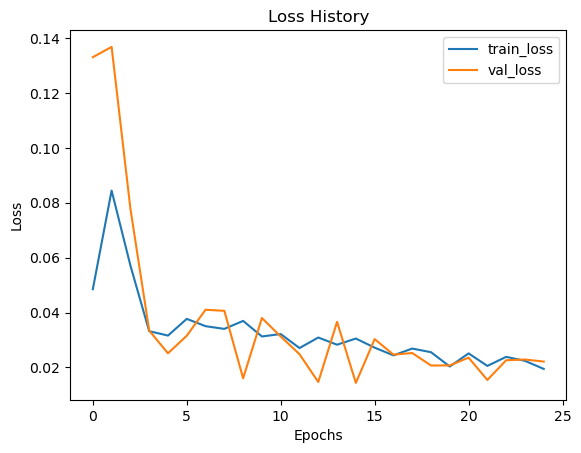

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

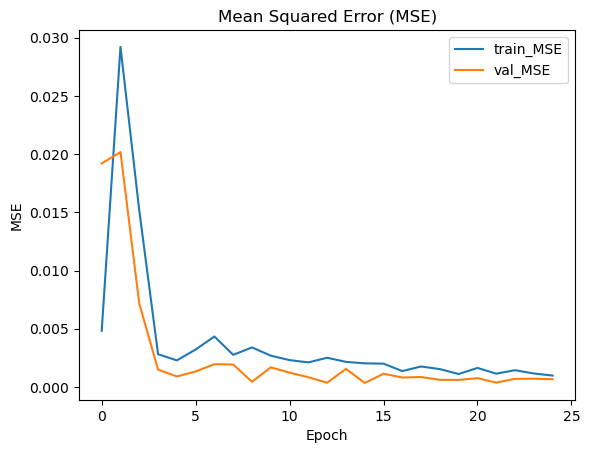

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

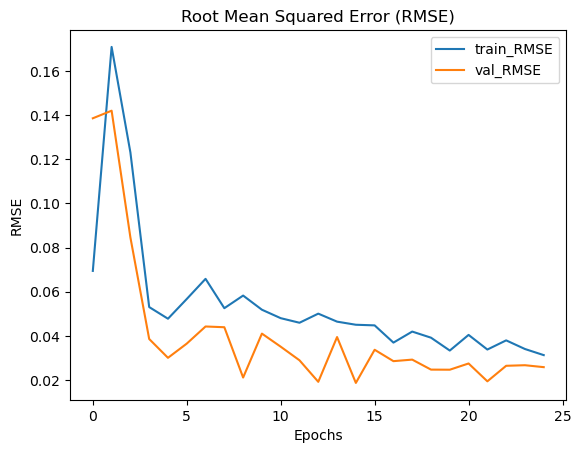

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

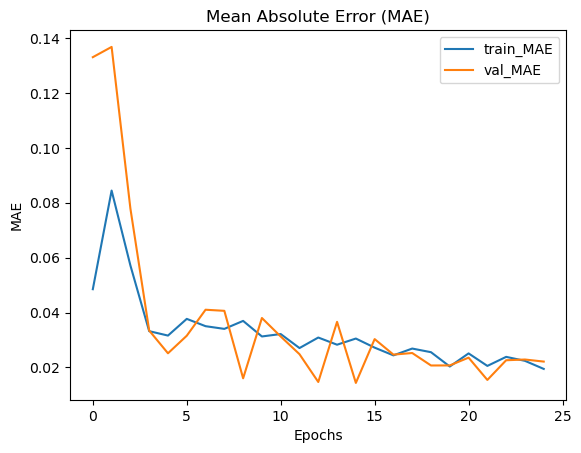

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

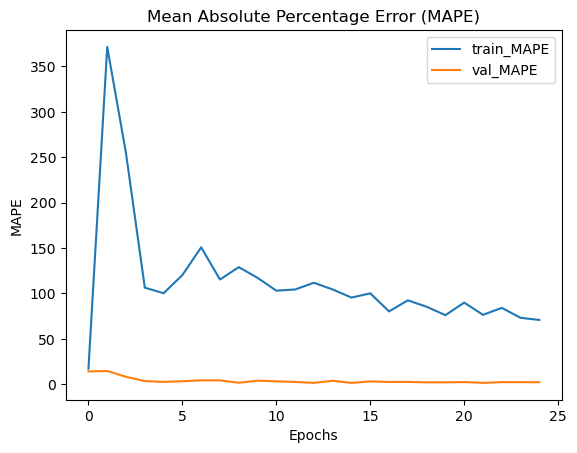

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:35:56.363366: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 4)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


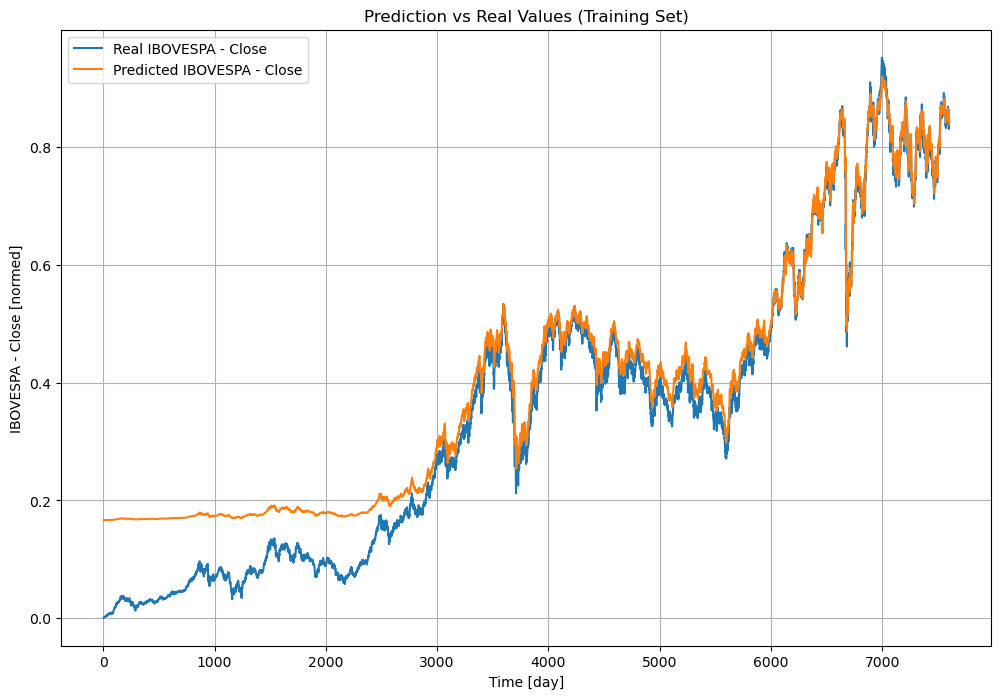

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


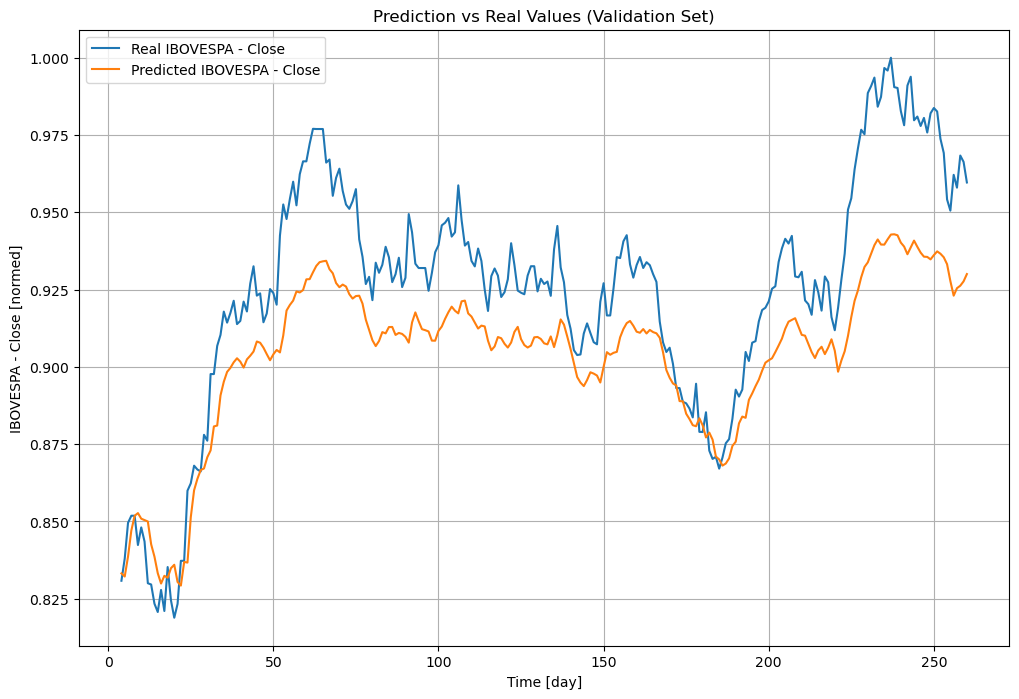

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


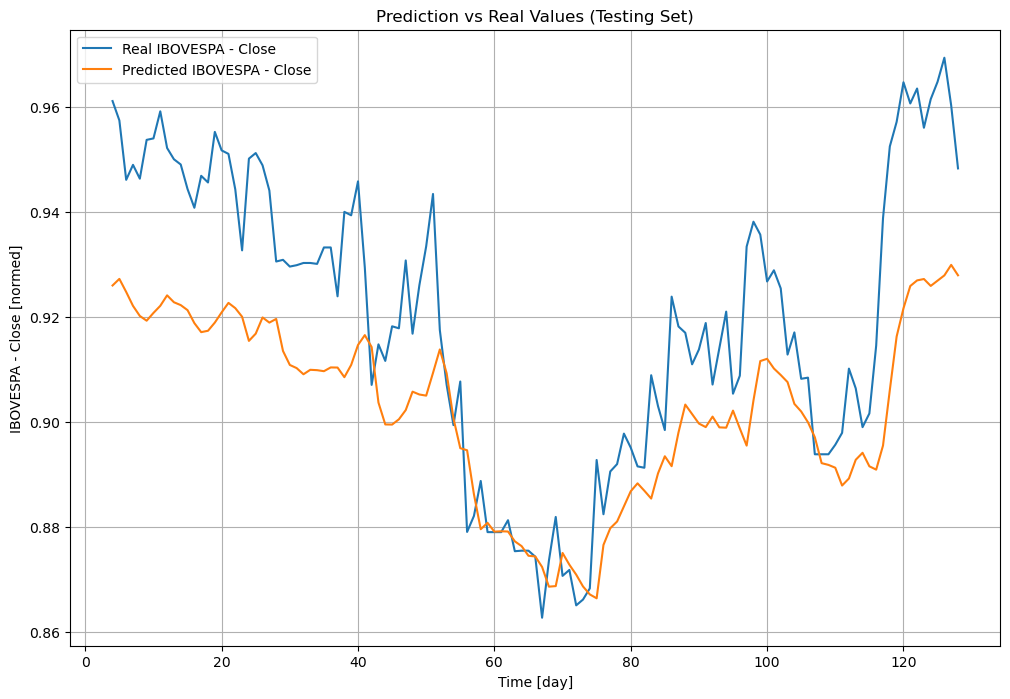

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

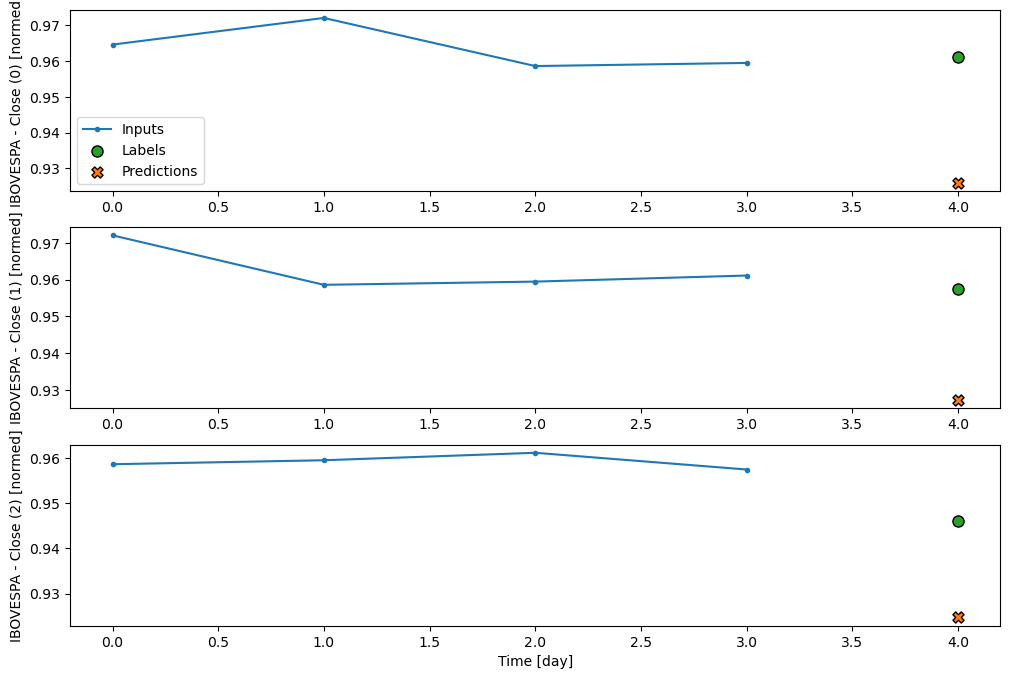

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:1s:265ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


array([[[0.92596984, 0.92596984, 0.92596984, ..., 0.92596984,
         0.92596984, 0.92596984]],

       [[0.9272274 , 0.9272274 , 0.9272274 , ..., 0.9272274 ,
         0.9272274 , 0.9272274 ]],

       [[0.9247373 , 0.9247373 , 0.9247373 , ..., 0.9247373 ,
         0.9247373 , 0.9247373 ]],

       ...,

       [[0.9278896 , 0.9278896 , 0.9278896 , ..., 0.9278896 ,
         0.9278896 , 0.9278896 ]],

       [[0.9298942 , 0.9298942 , 0.9298942 , ..., 0.9298942 ,
         0.9298942 , 0.9298942 ]],

       [[0.9279115 , 0.9279115 , 0.9279115 , ..., 0.9279115 ,
         0.9279115 , 0.9279115 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')